<a href="https://www.kaggle.com/markse123/elliptic-bitcoin-classifier?scriptVersionId=88413746" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

While I have some prior experience with ML, I am new to TensorFlow -- this is my first TensorFlow project beyond exploring the tutorials. I chose this particular project as a learning exercise. The Elliptic Bitcoin data set seemed interesting and challenging enough. Comments and feedback are appreciated. I would not be surprised if errors are found, if so please let me know so I can correct and learn.

--Mark

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import math
import random
import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sn
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

print("TensorFlow version: ", tf.__version__)

/kaggle/input/elliptic-data-set/elliptic_bitcoin_dataset/elliptic_txs_features.csv
/kaggle/input/elliptic-data-set/elliptic_bitcoin_dataset/elliptic_txs_classes.csv
/kaggle/input/elliptic-data-set/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv
/kaggle/input/elliptic-data-set/elliptic_bitcoin_dataset/elliptic_bitcoin_dataset/elliptic_txs_features.csv
/kaggle/input/elliptic-data-set/elliptic_bitcoin_dataset/elliptic_bitcoin_dataset/elliptic_txs_classes.csv
/kaggle/input/elliptic-data-set/elliptic_bitcoin_dataset/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv
TensorFlow version:  2.6.0


In [2]:
# Read in and pre-process data
columns = ['txId', 'timestep']

class_names = ['Illicit', 'Legal']

# Name the columns without known names
for x in range(165) :
    columns.append('col'+ str(x))

# These are the output labels
classes = pd.read_csv('/kaggle/input/elliptic-data-set/elliptic_bitcoin_dataset/elliptic_txs_classes.csv')

# These are 167 columns of feature data
features = pd.read_csv('/kaggle/input/elliptic-data-set/elliptic_bitcoin_dataset/elliptic_txs_features.csv', names=columns)

# Flatten the data, append class to features
data = features.assign(result=classes['class'])

# Trim the data to include only labeled data. 
new_data = data[data['result'] != "unknown"]
new_data['result'] = pd.to_numeric(new_data.result) - 1
print(new_data)

             txId  timestep      col0      col1      col2       col3  \
3       232438397         1  0.163054  1.963790 -0.646376  12.409294   
9       232029206         1 -0.005027  0.578941 -0.091383   4.380281   
10      232344069         1 -0.147852 -0.184668 -1.201369  -0.121970   
11       27553029         1 -0.151357 -0.184668 -1.201369  -0.121970   
16        3881097         1 -0.172306 -0.184668 -1.201369   0.028105   
...           ...       ...       ...       ...       ...        ...   
203752   80329479        49 -0.159293 -0.037276  1.018602  -0.121970   
203754  158406298        49 -0.172962 -0.126566  1.018602  -0.121970   
203759  158375075        49 -0.170412 -0.078164  1.018602   0.028105   
203763  147478192        49 -0.093732 -0.116160  1.018602  -0.121970   
203766  158375402        49 -0.172014 -0.078182  1.018602   0.028105   

            col4      col5       col6      col7  ...    col156    col157  \
3      -0.063725  9.782742  12.414558 -0.163645  ... -0.613

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [3]:
# Split 80/20 to train/test data
msk = np.random.rand(len(new_data)) < 0.8

x_train = new_data[msk]
x_train.pop('txId')

x_test = new_data[~msk]
x_test.pop('txId')

y_train = x_train.pop('result')
y_test = x_test.pop('result')

# build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(166),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model
model.fit(x_train, y_train, epochs = 5)

# test the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Make predictions
# A Softmax layer converts the Logit output to probabilities
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

# Use the model to predict the class of the test data
predictions = probability_model.predict(x_test)


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

Epoch 1/5
1168/1168 [==============================] - 3s 2ms/step - loss: 0.1472 - accuracy: 0.9552
Epoch 2/5
1168/1168 [==============================] - 3s 2ms/step - loss: 0.1068 - accuracy: 0.9682
Epoch 3/5
1168/1168 [==============================] - 2s 2ms/step - loss: 0.0924 - accuracy: 0.9728
Epoch 4/5
1168/1168 [==============================] - 2s 2ms/step - loss: 0.0869 - accuracy: 0.9746
Epoch 5/5
1168/1168 [==============================] - 2s 2ms/step - loss: 0.0840 - accuracy: 0.9756
288/288 - 1s - loss: 0.0816 - accuracy: 0.9761

Test accuracy: 0.9761051535606384


In [4]:
# Compute and show the MCC
incorrect = 0
FP = 0
FN = 0
TP = 0
TN = 0
predicted = []

for i in range(len(y_test)):
    pred = np.argmax(predictions[i])
    predicted.append(pred)
    
    if pred == 0 and y_test.iloc[i] == 1:
        FN += 1
    
    if pred == 1 and y_test.iloc[i] == 0:
        FP += 1

    if pred == 0 and y_test.iloc[i] == 0:
        TN += 1

    if pred == 1 and y_test.iloc[i] == 1:
        TP += 1
        
    if pred != y_test.iloc[i]:
        incorrect +=1

print("Test Accuracy:", round(100 * (TP + TN) / len(y_test), 2), "%")
print("Only", incorrect, "wrong out of", len(y_test), ", or", round(100 * float(incorrect) / len(y_test), 2), "%\n")

print("Confusion Matrix")
print("----------------")
print("TN(",TN, ")\tFP(", FP, ")")
print("FN(",FN, ")\tTP(", TP, ")\n")

print("Matthews Correlation Coefficient (MCC)")
print("--------------------------------------")
MCC = ((TP * TN) - (FP * FN)) / math.sqrt((TP + FP) * (TP + FN) * (TN + FP ) * (TN + FN))
print("MCC = ", round(MCC, 2), "on scale of [-1 1]")


Test Accuracy: 97.61 %
Only 220 wrong out of 9207 , or 2.39 %

Confusion Matrix
----------------
TN( 782 )	FP( 141 )
FN( 79 )	TP( 8205 )

Matthews Correlation Coefficient (MCC)
--------------------------------------
MCC =  0.86 on scale of [-1 1]


Predicted    0     1
Actual              
0          782   141
1           79  8205


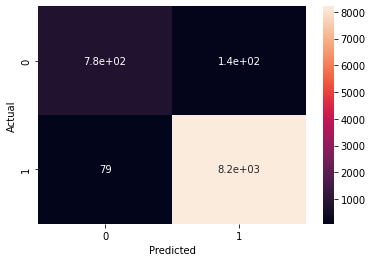

In [5]:
dict = {'y_Actual': y_test, 'y_Predicted': predicted}

df = pd.DataFrame(dict)

confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

sn.heatmap(confusion_matrix, annot=True)
plt.show()